# TIDE analysis

This Jupyter notebook reproduces the TIDE analysis plot for Figure 7.

In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('white', {
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'text.color': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black'
})

First we read the results from TIDE, which essentially lists the percentages and significance for indels between -10 and +10.

In [2]:
from nbsupport import tide

# Read the TIDE results.
data_tumor = pd.read_csv('../data/raw/sb/tide/myh9_tumor.txt', sep='\t')
data_5_days = pd.read_csv('../data/raw/sb/tide/myh9_5_days.txt', sep='\t')
data_50_days = pd.read_csv('../data/raw/sb/tide/myh9_50_days.txt', sep='\t')

data_tumor.head()

,shift,percentage,pvalue
0,-10,0.1,0.770
1,-9,0.4,0.260
2,-8,0.0,1.000
3,-7,0.6,0.097
4,-6,0.0,1.000


Then we plot these data using our custom plotting function, which recreates the original TIDE plots using matplotlib.

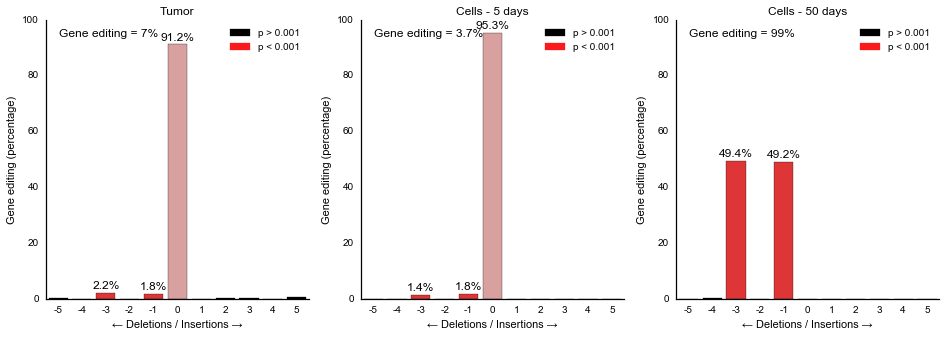

In [3]:
# Plot the results.
fig, axes = plt.subplots(ncols=3, figsize=(16, 5))
tide.plot(data_tumor, overall_efficiency=7, ax=axes[0])
tide.plot(data_5_days, overall_efficiency=3.7, ax=axes[1])
tide.plot(data_50_days, overall_efficiency=99, ax=axes[2])

axes[0].set_title('Tumor')
axes[1].set_title('Cells - 5 days')
axes[2].set_title('Cells - 50 days')

for ax in axes:
    ax.set_xlim(4.5, 15.5)

# Plot again for manuscript.
with sns.plotting_context('paper', font_scale=0.7): 
    fig, axes = plt.subplots(ncols=3, figsize=(9.5, 2.5))

    tide.plot(data_tumor, overall_efficiency=7, 
              ax=axes[0], label_kws={'fontsize': 6})
    tide.plot(data_5_days, overall_efficiency=3.7,
              ax=axes[1], label_kws={'fontsize': 6})
    tide.plot(data_50_days, overall_efficiency=99,
              ax=axes[2], label_kws={'fontsize': 6})
   
    axes[0].set_title('Tumor')
    axes[1].set_title('5 days after isolation')
    axes[2].set_title('50 days after isolation')

    for ax in axes:
        ax.set_xlim(4.5, 15.5)
        
    fig.savefig('../reports/figures/fig_7e_tide.pdf', bbox_inches='tight')
    plt.close(fig)